## Group S - NSW Crime Report
### Drug Offences - Simon Grant



In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#read data files
crimeRateTS = crimeTS = pd.read_csv("data/crimeTS.gzip", compression="gzip")
crimeRateSubTS = crimeSubTS = pd.read_csv("data/crimeSubTS.gzip", compression="gzip")
crimeDS = pd.read_csv("data/crimeDS.gzip", compression="gzip")
crimeSubDS = pd.read_csv("data/crimeSubDS.gzip", compression="gzip")
offence = 'Drug offences'

#filter drug offences 2016
offenceDS = crimeDS[crimeDS['Offence category'] == offence].sort_values('offence_rate')
offenceSubDS = crimeSubDS[crimeSubDS['Offence category'] == offence].sort_values('offence_rate')

#filter for time series
offenceTS = crimeRateTS[crimeRateTS['Offence category'] == offence]
offenceSubTS = crimeRateSubTS[crimeRateSubTS['Offence category'] == offence]

## NSW Summary

### Overall drug offences 2013 - 2018

NSW population ranged from 7.39 to 7.97 million from 2013 to 2018. 
Drug offences rose from 35,677 in 2013 to 46814 in 2018. 
giving an offence rate of  48 per 10,000 (2013) to around 58 per 10,000 (2018)


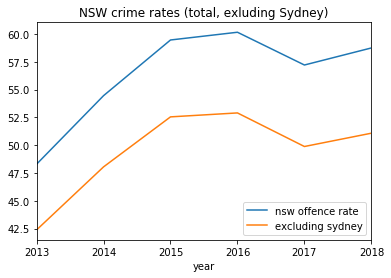

In [104]:
nswYear = offenceTS[['total', 'population', 'year']].groupby('year').sum()
nswYear['nsw offence rate'] = nswYear.total.div(nswYear.population).mul(1e4)
nswYear = nswYear.drop(columns=['total', 'population'])
#nswYear.nsw_offence_rate.plot()
sydney = offenceTS[offenceTS.LGA != 'Sydney']
sydneyYear = sydney[['total', 'population', 'year']].groupby('year').sum()
sydneyYear['excluding sydney'] = sydneyYear.total.div(sydneyYear.population).mul(1e4)
sydneyYear = sydneyYear.drop(columns=['total', 'population'])
nswYear.merge(sydneyYear, left_on="year", right_on="year").plot(title="NSW crime rates (total, exluding Sydney)")
#sydneyYear.sydney_offence_rate.plot()

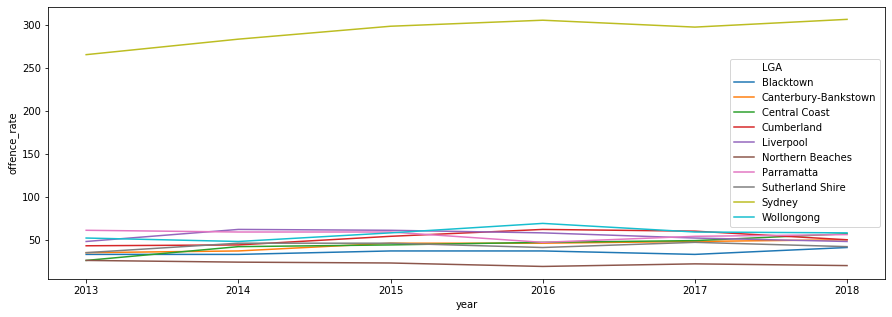

In [105]:
top_cities = crimeTS.loc[crimeTS.year == 2018, [ 'LGA', 'population']].groupby([ 'LGA', 'population']).sum().sort_values('population', ascending=False)[:10].reset_index()
cities = offenceTS.loc[ offenceTS.LGA.isin(top_cities.LGA), ['population', 'year', 'total', 'LGA']].groupby([ 'LGA', 'year']).sum().reset_index()
cities['offence_rate'] = cities.total.div(cities.population).mul(1e4).round()
plt.figure(figsize=(15,5))
sns.lineplot(x="year", y="offence_rate", hue="LGA", data=cities)

### Offence Rate distribution 2016

The median offence rate in NSW for 2016 was around 58 per 10,000 people. 
The distribution is right skewed with Sydney, Lismore and Byron as notable outliers 
(offence rates of 305, 206, 181 respectively).

Lane Cove , Ku-ring-gai and Ryde and Mosman had the lowest drug offence rates in NSW. 
(9, 10, 16, 16 respectively)

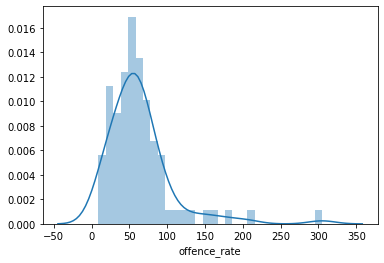

In [106]:
offenceDS = offenceDS[offenceDS.population > 10000]
offenceSubDS = offenceSubDS[offenceSubDS.population > 10000]
sns.distplot(offenceDS['offence_rate'], bins=30)

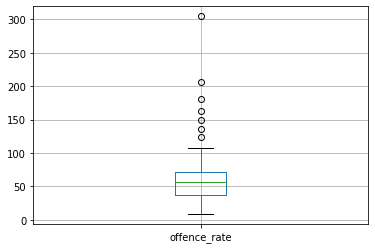

In [107]:
offenceDS.boxplot('offence_rate')

In [109]:
offenceDS['offence_rate'].describe()

count     90.000000
mean      63.118966
std       43.952899
min        8.754709
25%       37.784668
50%       57.196199
75%       71.272149
max      304.646704
Name: offence_rate, dtype: float64

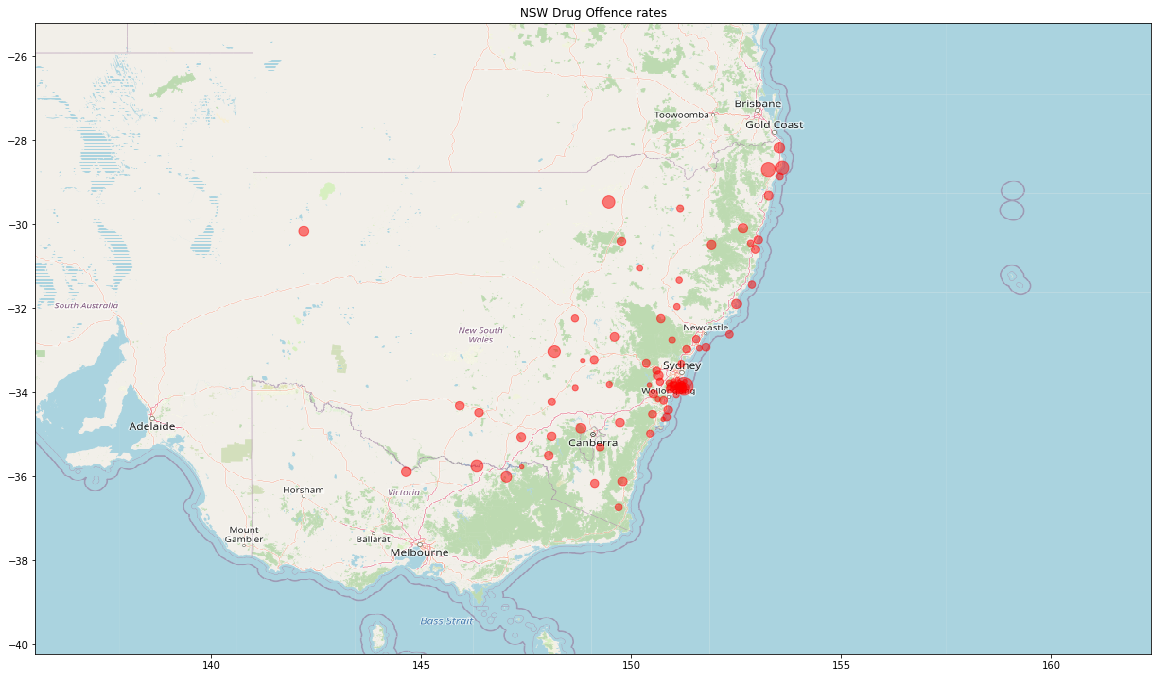

In [110]:
BBox = (135.813, 162.378, -40.229, -25.205)
nsw_map = plt.imread('nsw.png')
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(offenceDS.long, offenceDS.lat, zorder=1, alpha= 0.5, c='red', s=offenceDS.offence_rate)
ax.set_title('NSW Drug Offence rates')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(nsw_map, zorder=0, extent = BBox, aspect= 'equal')

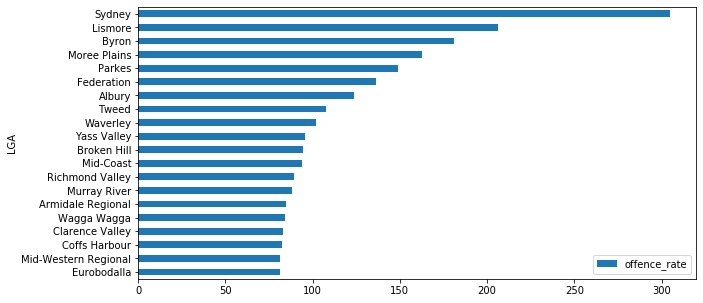

In [111]:
highest_rates = offenceDS.loc[offenceDS.offence_rate >= 80, ['LGA', 'offence_rate', 'Total', 'population']]
highest_rates.plot.barh(x='LGA', y=['offence_rate'],figsize=(10,5))

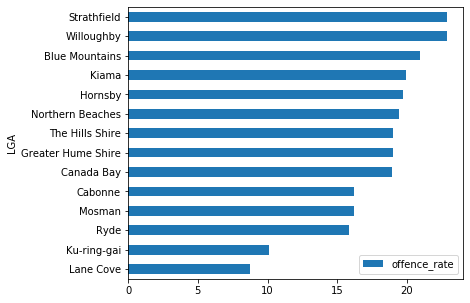

In [112]:
lowest_rates = offenceDS.loc[offenceDS.offence_rate < 25, ['LGA', 'offence_rate', 'Total', 'population']]
lowest_rates.plot.barh(x='LGA', y=['offence_rate'],figsize=(6,5))

### Outliers

Sydney is excluded from the dataset as it is an extreme outlier. Because it is the main centralised city in NSW, drug offence rates may be less determined by our covariates and may skew results. 

Itaccounted for 14.6% of drug offences in 2016. Byron is also excluded as it is a well known
tourist area and regularly attracts visitors from other areas.

Areas with populations less than 10,000 were excluded from the datasets as they tended
to highly skew offence rates with just a handful of offences. 

In [113]:
offenceDS = offenceDS[offenceDS.LGA != 'Sydney']
offenceDS = offenceDS[offenceDS.LGA != 'Byron']
offenceDS = offenceDS[offenceDS.population > 10000]

offenceSubDS = offenceSubDS[offenceSubDS.LGA != 'Sydney']
offenceSubDS = offenceSubDS[offenceSubDS.LGA != 'Byron']
offenceSubDS = offenceSubDS[offenceSubDS.population > 10000]

### Correlations

We look for correlations with drug offence rate against covariates for age, income, population density, and death/fertility rate. We don't see any convincing correlations for these factors. Many high offence rate areas include regional and urbanised areas which would explain the low correlation with population density. It could be that the explanations are more complex than just these factors or that the category of 'drug offences' is too broad. 

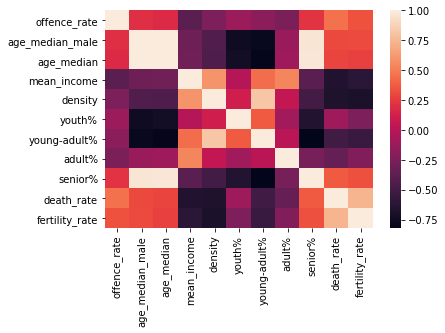

In [125]:
offenceDS.columns
corr = offenceDS[['offence_rate', 'age_median_male', 'age_median', 'mean_income', 'density', 'youth%', 'young-adult%', 
               'adult%', 'senior%', 'death_rate', 'fertility_rate']].corr()
sns.heatmap(corr)

We look for correlations with covariates for percentage of nationality, but again there is little evidence to explain drug offence rates. 

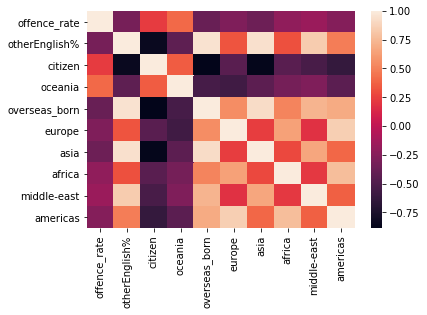

In [115]:
corr = offenceDS[['offence_rate', 'otherEnglish%', 'citizen', 'oceania', 'overseas_born',
       'europe', 'asia', 'africa', 'middle-east', 'americas']].corr()
sns.heatmap(corr)

In [116]:
corr = offenceDS[['offence_rate', 'office', 'professionals', 'trades']].corr()
print(corr['offence_rate'])

offence_rate     1.000000
office          -0.082334
professionals   -0.321619
trades           0.343746
Name: offence_rate, dtype: float64


### Drug Offences - SubCategories

We sharpen our analysis by looking at drug offence sub categories

In [117]:
subcategories = offenceSubDS.Subcategory.unique()
subcategories

array(['Manufacture drug', 'Importing drugs',
       'Possession and/or use of cocaine',
       'Possession and/or use of narcotics',
       'Dealing, trafficking in cocaine',
       'Dealing, trafficking in ecstasy',
       'Dealing, trafficking in narcotics',
       'Possession and/or use of ecstasy',
       'Possession and/or use of other drugs',
       'Dealing, trafficking in other drugs',
       'Dealing, trafficking in amphetamines',
       'Dealing, trafficking in cannabis',
       'Possession and/or use of amphetamines', 'Cultivating cannabis',
       'Other drug offences', 'Possession and/or use of cannabis'],
      dtype=object)

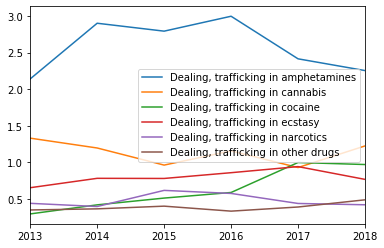

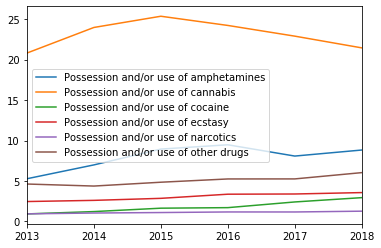

In [118]:
#nswSummary = offenceSubTS[['total', 'population', 'Subcategory', 'year']].groupby(['Subcategory', 'year']).sum()
nswSummary = offenceSubTS.loc[:, ['LGA', 'total', 'population', 'Subcategory', 'year']].groupby(['Subcategory', 'year']).sum()
nswSummary['offence_rate'] = nswSummary.total.div(nswSummary.population).mul(1e4)
nswSummary = nswSummary.reset_index()

subcats = nswSummary.Subcategory.unique()
displayDF = pd.DataFrame(index=nswSummary.year.unique())
for subcat in subcats:
    displayDF[subcat] = np.array(nswSummary.loc[nswSummary.Subcategory == subcat, 'offence_rate'])


dealing = displayDF.loc[:, displayDF.columns.str.contains('Dealing')]
possession = displayDF.loc[:, displayDF.columns.str.contains('Possession')]
dealing.plot()
possession.plot()

Possession offences are generally lower than for dealing / trafficking. Possession of cannabis was the highest rated possession offence. Dealing amphetamines was the highest for dealing/possession offences. When exluding Sydney and Byron, these offences more or less stayed constant since 2013. 

### Correlations

We programmatically search for correlations between possession or dealing drug offences and our covariates. 

In [119]:
covariates  = offenceSubDS.columns.drop(['LGA', 'Offence category', 'Subcategory', 'Total', 'offence_rate', 'code', 'lat', 'long'])
print(', '.join(list(covariates)))

year, age_median, age_median_female, age_median_male, population, density, fertility_rate, death_rate, children%, youth%, young-adult%, adult%, senior%, otherEnglish%, citizen, oceania, overseas_born, europe, asia, africa, middle-east, americas, median_income, mean_income, office, professionals, trades


In [120]:
correlations  = pd.DataFrame(columns=['subcategory', 'covariate', 'correlation'])
for subcategory in subcategories:
    for covariate in covariates:
        correlation = offenceSubDS.loc[offenceSubDS.Subcategory == subcategory, 'offence_rate'].corr(offenceSubDS[covariate])
        if correlation > 0.55:
            correlations = correlations.append({'subcategory': subcategory, 'covariate': covariate, 'correlation': correlation}, ignore_index=True)
            
       
correlations.sort_values('correlation', ascending=False)


,subcategory,covariate,correlation
4,"Dealing, trafficking in cocaine",africa,0.691122
0,Possession and/or use of cocaine,africa,0.676514
2,Possession and/or use of narcotics,middle-east,0.676436
5,"Dealing, trafficking in cocaine",americas,0.599764
7,Possession and/or use of amphetamines,oceania,0.580629
3,"Dealing, trafficking in cocaine",europe,0.574295
1,Possession and/or use of cocaine,americas,0.571940
8,Cultivating cannabis,age_median_male,0.565360
6,Possession and/or use of amphetamines,death_rate,0.564615


There are some mild correlations with regards to possession and trafficking, particularly against nationality percentage. 

### Drug offence Clusters

We want to find clusters of drug crime in regions that are close to each other with similar offence rates. 
To do this, we use latitude, longitude and offence_rate covariates. However the difference between latitude and
longitude values are very small compared to differences with offence rates. So all covariates are normalised. 
In addition, latitude and longitude are scaled up by a factor of 2 to give it greater precedence than offence rate. 

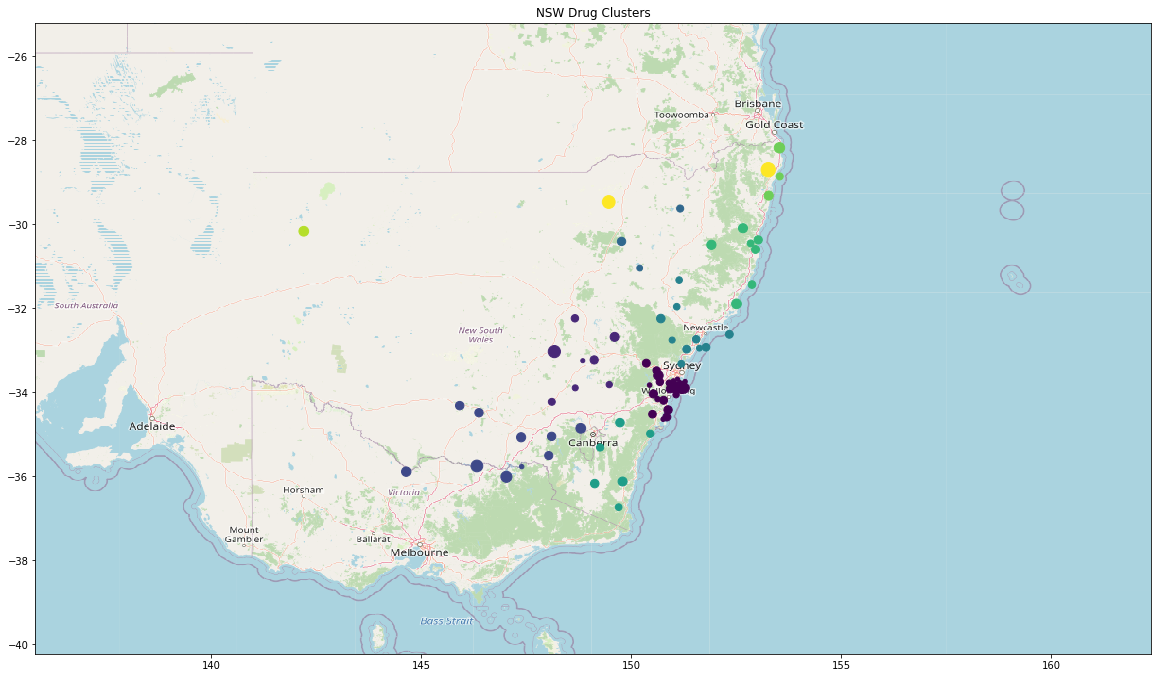

In [121]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pylab as plt
from scipy.spatial.distance import pdist
from sklearn.preprocessing import minmax_scale

scaleDS = pd.DataFrame(minmax_scale(offenceDS[['lat', 'long', 'offence_rate']]), columns=['lat', 'long', 'offence_rate'])

scaleDS.lat = scaleDS.lat.mul(2)
scaleDS.long = scaleDS.long.mul(2)

#offenceDS[offenceDS.lat.isna()]
#lgas = offenceDS['LGA']
#lgas
dist = pdist(scaleDS.loc[ : , ['lat', 'long', 'offence_rate']], 'euclidean')

linkage_matrix = linkage(dist, method = 'ward')
#linkage_matrix
#plt.figure(figsize=(15, 7))
#dendrogram(linkage_matrix)
offenceDS['cluster'] = cut_tree(linkage_matrix, n_clusters=10)

BBox = (135.813, 162.378, -40.229, -25.205)
nsw_map = plt.imread('nsw.png')
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(offenceDS.long, offenceDS.lat, zorder=1, alpha= 1, c=offenceDS.cluster, s=offenceDS.offence_rate)
ax.set_title('NSW Drug Clusters')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(nsw_map, zorder=0, extent = BBox, aspect= 'equal')

Using K-means clustering with a K value of 10 does a reasonable job. Clusers are found in the north coast, mid coast and central coast. Another cluster appears on the south coast and south west (Riverina region). Two larger yellow cluster to the north are Lismore and Moree with particularly high rates. 

### Multiple Linear Regression

Multiple linear regression is applied for each drug offence subcategory using all covariates. 

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.feature_selection import RFE

In [126]:
resultsDF = pd.DataFrame(columns=["category", "mse", "r2"])
model_fits = mf = {}
for subcat in subcategories:
        coke = offenceSubDS[offenceSubDS.Subcategory == subcat]
        lm = linear_model.LinearRegression()
        X = coke[covariates]
        y = coke.offence_rate
        rfe = RFE(lm, 26)
        rfe.fit(X, y)
        predicted = rfe.predict(X)
        r2 = r2_score(y, predicted)
        mse = MSE(y, predicted)
        resultsDF = resultsDF.append({ 'category': subcat, 'mse': mse, 'r2': r2}, ignore_index=True)
 
resultsDF.sort_values('r2', ascending=False)


,category,mse,r2
4,"Dealing, trafficking in cocaine",0.119740,0.748697
12,Possession and/or use of amphetamines,17.131871,0.461348
3,Possession and/or use of narcotics,0.482173,0.443029
13,Cultivating cannabis,5.144332,0.322594
7,Possession and/or use of ecstasy,8.508290,0.320737
5,"Dealing, trafficking in ecstasy",0.378394,0.317842
2,Possession and/or use of cocaine,2.947329,0.295734
0,Manufacture drug,0.048048,0.227288
14,Other drug offences,32.396047,0.003333
11,"Dealing, trafficking in cannabis",9.663732,-0.019513


Only a moderate result was gained for dealing and trafficking in cocaine with an R2 value of ~ 75%. 

### Neural Network Model

We apply a neural network (the regression variation )to try and improve our model. The only reasonable result was again for dealing and trafficking in cocaine with an R2 of 82%. The slight descretion with the training accuracy of 97%, suggesting some overfitting. 

In [127]:
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore")

coke = offenceSubDS.loc[offenceSubDS.Subcategory == 'Dealing, trafficking in cocaine']

y = coke['offence_rate']
X = minmax_scale(coke[covariates])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
regr = MLPRegressor(random_state=1, hidden_layer_sizes=[70, 70]).fit(X_train, y_train)

predicted_train = regr.predict(X_train)
r2 = r2_score(y_train, predicted_train)
mse = MSE(y_train, predicted_train)
print(f"Neural Network accuracy (train): {r2:.2f}, MSE: {mse:.2f}")

Neural Network accuracy (train): 0.97, MSE: 0.01


In [89]:
predicted_test = regr.predict(X_test)
r2 = r2_score(y_test, predicted_test)
mse = MSE(y_test, predicted_test)
print(f"Neural Network accuracy (test): {r2:.2f}, MSE: {mse:.2f}")

Neural Network accuracy (test): 0.81, MSE: 0.16


## Conclusions

Sydney dominates NSW in terms of drug crime offences, as did Byron and Lismore. When creating a predictive model from our demograhic factors, there was little correlation with overall drug crime offences. We then tried to focus on sub-crime categories with only slight improvement particulary for tracking/dealing cocaine. 

These results may suggest that the factors we have selected may not be the best predictors for drug offences, or atleast contributing factors may be more complicated. 